In [2]:
import pandas as pd
import numpy as np

In [3]:

path='./Admission_Predict_Ver1.1.csv'

In [4]:
df=pd.read_csv(path)
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [5]:
df1=df.copy()
df1

# For Data Preprocessing We Copy Our DataFrame For Back-up
#And We Use this dataframe further


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


<h3> First We See Size of Our DataFrame</h3>


In [6]:
df1.shape

#It Shows There Are 400 Records/Rows And 9 Features/Columns 

(500, 9)

In [ ]:
df1.columns

#It's Shows Features Of Our Dataframe

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
df1.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

**<h3>Describe The Data</h3>**

In [ ]:
df1.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [ ]:
Outliers=pd.DataFrame(columns=['features','NoOfOutliers'])
Outliers

,features,NoOfOutliers


In [ ]:
for col in df1.describe().columns.tolist():
    q1=df1[col].quantile(0.25)
    q2=df1[col].quantile(0.50)
    q3=df1[col].quantile(0.75)
    iqr=q3-q1
    low_value=q1-1.5*iqr
    high_value=q3+1.5*iqr
    Outliers=Outliers.append({'features':col,'NoOfOutliers':df1.loc[(df1[col]>high_value) | (df1[col]<low_value)].shape[0]},ignore_index=True)
    # df1.loc[(df1[col]>high_value) | (df1[col]<low_value)

    

In [ ]:
Outliers

,features,NoOfOutliers
0,Serial No.,0
1,GRE Score,0
2,TOEFL Score,0
3,University Rating,0
4,SOP,0
5,LOR,1
6,CGPA,0
7,Research,0
8,Chance of Admit,2


**Interpretation Of Features Of Our DataFrame**

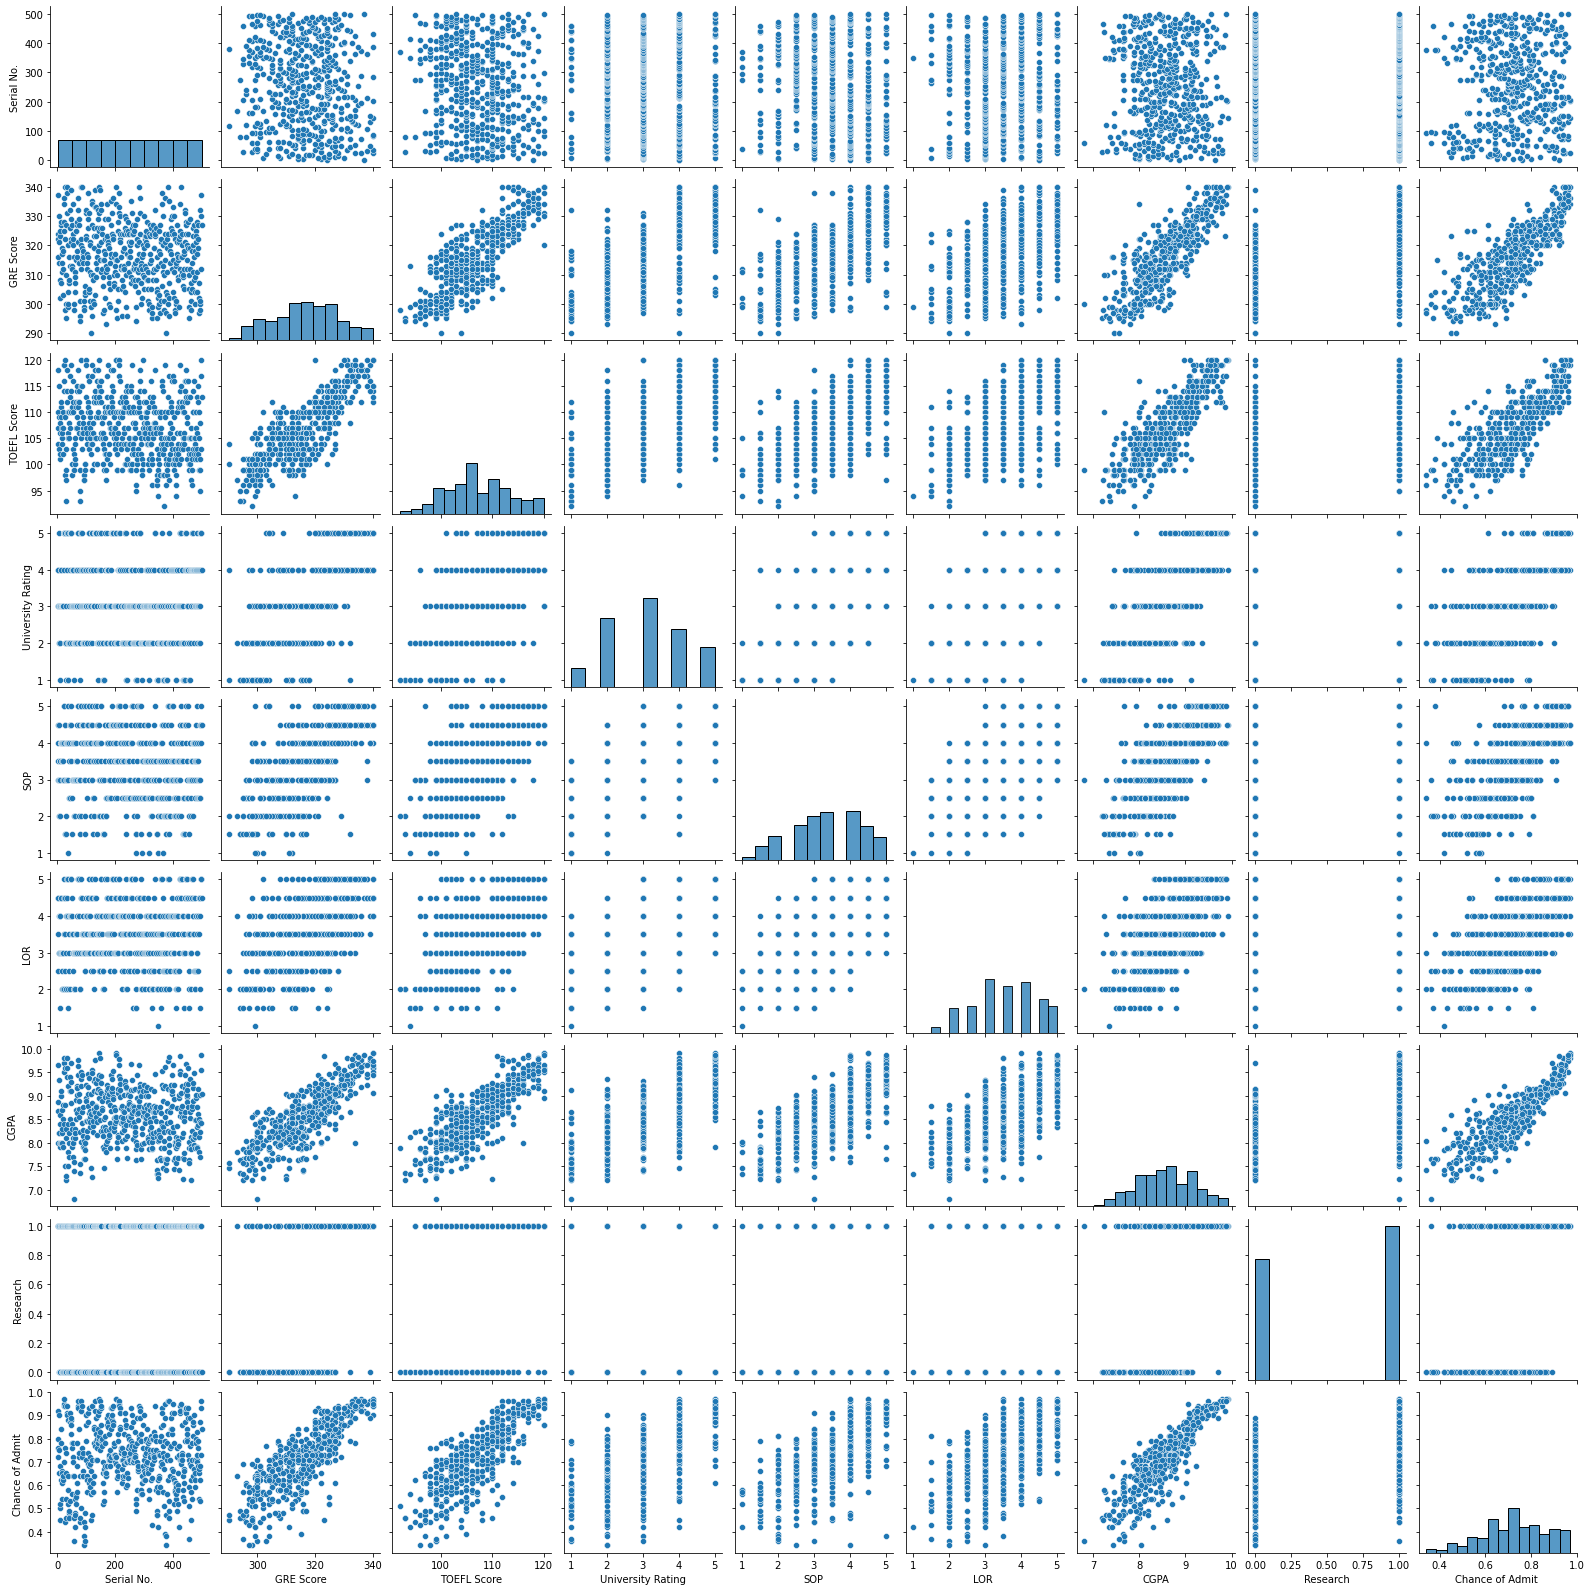

In [ ]:
import seaborn as sns

sns.pairplot(df1)

In [ ]:
df1.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


**Now We Apply Linear Regression**

**Import Libraries**


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
x=df1[['GRE Score','TOEFL Score','CGPA','University Rating','SOP']]

In [ ]:
x

,GRE Score,TOEFL Score,CGPA,University Rating,SOP
0,337,118,9.65,4,4.5
1,324,107,8.87,4,4.0
2,316,104,8.00,3,3.0
3,322,110,8.67,3,3.5
4,314,103,8.21,2,2.0
...,...,...,...,...,...
495,332,108,9.02,5,4.5
496,337,117,9.87,5,5.0
497,330,120,9.56,5,4.5
498,312,103,8.43,4,4.0


In [ ]:
y=df1[['Chance of Admit ']]
y

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65
...,...
495,0.87
496,0.96
497,0.93
498,0.73


In [ ]:
# K-Fold Validation
model=LinearRegression()
train_error=[]
test_error=[]

for i in range(5):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y)

  #Train Model
    model.fit(xtrain,ytrain)

    ytrainP=model.predict(xtrain)
    ytestP=model.predict(xtest)

    train_error.append(abs(ytrain-ytrainP).mean())
    test_error.append(abs(ytest-ytestP).mean())


In [ ]:
np.array(train_error).mean()

0.04308847264474408

In [ ]:
np.array(test_error).mean()

0.04531427719062596

In [ ]:
xtrain_l,xtest_l,ytrain_l,ytest_l=train_test_split(x,y,random_state=1)

In [ ]:
xtrain_l.shape

(375, 5)

In [ ]:
ytrain_l.shape

(375, 1)

In [ ]:
model_l=LinearRegression(fit_intercept=True)
model_l.fit(xtrain_l,ytrain_l)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
yp_l=model_l.predict(xtest_l)

In [ ]:
b=model_l.intercept_
b

array([-1.4334063])

In [ ]:
w1=model_l.coef_
w1

array([[0.00220272, 0.00360362, 0.11863959, 0.0082351 , 0.00907618]])

In [ ]:
# yp_l=0.010 * df1['GRE Score'] + (-2.45)

In [ ]:
yp_l

array([[0.67732069],
       [0.69505397],
       [0.97496837],
       [0.72152296],
       [0.81566934],
       [0.64421959],
       [0.73508395],
       [0.70377413],
       [0.77772765],
       [0.64144237],
       [0.66414469],
       [0.52155271],
       [0.77883715],
       [0.81975825],
       [0.76696123],
       [0.8476838 ],
       [0.64230137],
       [0.77760548],
       [0.90754776],
       [0.6877515 ],
       [0.61747021],
       [0.778766  ],
       [0.84117097],
       [0.55493872],
       [0.80905481],
       [0.58104554],
       [0.93944716],
       [0.65653876],
       [0.84956935],
       [0.70877597],
       [0.64348076],
       [0.81510025],
       [0.59316425],
       [0.90745437],
       [0.51914903],
       [0.82437755],
       [0.69726315],
       [0.63807375],
       [0.67198303],
       [0.92138839],
       [0.57991569],
       [0.65196551],
       [0.74562154],
       [0.97578131],
       [0.77798247],
       [0.54197562],
       [0.68565749],
       [0.657

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


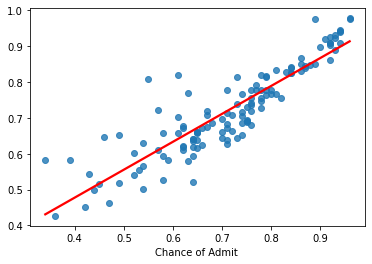

In [ ]:
import matplotlib.pyplot as plt
# plt.scatter(yp_l,ytest_l)
# plt.plot(yp_l,ytest_l,'r')

sns.regplot(ytest_l,yp_l,line_kws={'color':'red'},ci=None)

In [ ]:
ytest_l.shape

(125, 1)

In [ ]:
yp_l.shape

(125, 1)

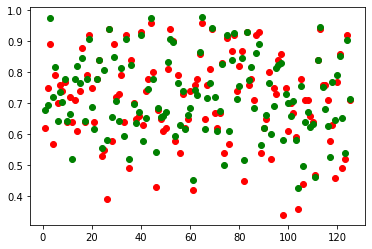

In [ ]:
plt.scatter(range(1,len(xtest_l)+1),ytest_l,c='r')
plt.scatter(range(1,len(xtest_l)+1),yp_l,c='g')
plt.show()

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


In [ ]:
r2=r2_score(ytest_l,yp_l)
r2

0.7958918919631824

In [ ]:
mse=mean_squared_error(ytest_l,yp_l)
mse

0.004161879929703101

In [ ]:
mae=mean_absolute_error(ytest_l,yp_l)
mae

0.042838967822778164